### Week 2- Using an API 
Call 10 day / 3 hour forecast data using the Open Weather Map API (available at: https://openweathermap.org)

In [28]:
# Store api key in a variable. Made available on the api documentation, but required signing up to access.
api_key = '02fe394e535f08d14e8951976546c465'


In [41]:
import requests 
import time
import csv

# Call api using api key and turn response into json format for readability
def get_weather(api_key, city_name):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    data = response.json()

# Check is the spi is accessible
    if response.status_code == 200:
        return data
    else:
        return None

# Gather data fro a bunch of cities and store this into a data sheet, first store all the city names in a variable
city_names = ['London', 'New York City', 'Tokyo','Paris', 'Beijing', 'Moscow', 'Sydney', 'Rio de Janeiro', 'Cairo', 'Mumbai', 'Istanbul', 'Berlin', 'Mexico City', 'Buenos Aires', 'Rome', 'Toronto', 'Seoul', 'Dubai', 'Cape Town', 'Bangkok',
              'Amsterdam', 'Athens', 'Auckland', 'Bangalore', 'Barcelona', 'Budapest', 'Copenhagen', 'Doha', 'Edinburgh', 'Florence',
    'Geneva', 'Helsinki', 'Hong Kong', 'Jakarta', 'Jerusalem', 'Kuala Lumpur', 'Lisbon', 'Madrid', 'Manila', 'Melbourne',
    'Montreal', 'Nairobi', 'Oslo', 'Prague', 'Reykjavik', 'San Francisco', 'Santiago', 'São Paulo', 'Stockholm', 'Vienna',
    'Warsaw', 'Zurich', 'Abu Dhabi', 'Algiers', 'Ankara', 'Belfast', 'Bogotá', 'Brasília', 'Brussels', 'Caracas', 'Delhi',
    'Dublin', 'Hanoi', 'Havana', 'Islamabad', 'Johannesburg', 'Kiev', 'Kingston', 'Kolkata', 'Lima', 'Nairobi',
    'Nassau', 'Nicosia', 'Nouakchott', 'Ottawa', 'Panama City', 'Pretoria', 'Pyongyang', 'Quito', 'Riga', 'Sanaa',
    'Sofia', 'Taipei', 'Tallinn', 'Tegucigalpa', 'Tehran', 'Tunis', 'Ulaanbaatar', 'Vaduz', 'Valletta', 'Vatican City',
    'Wellington', 'Windhoek', 'Yerevan', 'Bucharest', 'Copenhagen', 'Havana', 'Kabul', 'La Paz', 'Monaco', 'Naypyidaw',
    'San José', 'Sarajevo', 'Tirana', 'Vilnius', 'Zagreb', 'Astana', 'Belgrade', 'Chisinau', 'Georgetown', 'Helsinki',
    'Kathmandu', 'Kiev', 'Minsk', 'Nicosia', 'Podgorica', 'Port Moresby', 'Pristina', 'Sofia']
     

# Create a data sheet for the next protocal
with open('data\weather_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['City', 'Temperature (°C)', 'Description', 'Humidity (%)', 'Wind Speed (m/s)']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for city in city_names:
        weather_data = get_weather(api_key, city)
        if weather_data:
            writer.writerow({
                'City': city,
                'Temperature (°C)': weather_data['main']['temp'],
                'Description': weather_data['weather'][0]['description'],
                'Humidity (%)': weather_data['main']['humidity'],
                'Wind Speed (m/s)': weather_data['wind']['speed']})
            
            print(f"Weather in {city}:")
            print(f"Temperature: {weather_data['main']['temp']}°C")
            print(f"Description: {weather_data['weather'][0]['description']}")
            print(f"Humidity: {weather_data['main']['humidity']}%")
            print(f"Wind Speed: {weather_data['wind']['speed']} m/s")
            time.sleep(5)  # Just in case to not overload the API server with too many requests
    else:
            print(f"Failed to fetch weather data for {city}.")


Weather in London:
Temperature: 5.99°C
Description: scattered clouds
Humidity: 79%
Wind Speed: 5.36 m/s
Weather in New York City:
Temperature: 1.13°C
Description: overcast clouds
Humidity: 69%
Wind Speed: 5.14 m/s
Weather in Tokyo:
Temperature: 7.54°C
Description: few clouds
Humidity: 40%
Wind Speed: 12.86 m/s
Weather in Paris:
Temperature: 8.95°C
Description: mist
Humidity: 96%
Wind Speed: 4.12 m/s
Weather in Beijing:
Temperature: 3.94°C
Description: overcast clouds
Humidity: 37%
Wind Speed: 3.63 m/s
Weather in Moscow:
Temperature: -1.32°C
Description: overcast clouds
Humidity: 86%
Wind Speed: 5.76 m/s
Weather in Sydney:
Temperature: 22.73°C
Description: broken clouds
Humidity: 77%
Wind Speed: 8.23 m/s
Weather in Rio de Janeiro:
Temperature: 25.98°C
Description: broken clouds
Humidity: 94%
Wind Speed: 2.57 m/s
Weather in Cairo:
Temperature: 22.42°C
Description: clear sky
Humidity: 30%
Wind Speed: 4.12 m/s
Weather in Mumbai:
Temperature: 32.99°C
Description: smoke
Humidity: 31%
Wind Sp

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [68]:
!pip install cartopy

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

KeyError: ''

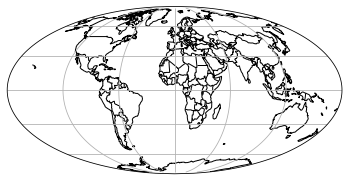

In [61]:
# Create map visualisation for 'weather-data.csv'
# Install cartopy and plotting/ data analysis libraries
# Code adapted from: https://blog.weatherstack.com/blog/how-to-visualize-global-weather-data-in-python/

# Define map projection within the ccr model ( PlateCarree or Robinson, which can be found at : https://scitools.org.uk/cartopy/docs/latest/reference/projections.html)
projection = ccrs.Mollweide() # measurements of the Earth within this projection are commonly used for world maps

fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Add coastlines 
ax.coastlines()

# Boarders 
ax.add_feature(cfeature.BORDERS)

# Add gridlines without labels ( with labels crowded the map)
ax.gridlines(draw_labels=False)

# Plot a cities on map using 'weather_data.csv' using a for loop and pandas iterows() method to call data points
 # iterrows() method learnt from; https://www.w3schools.com/python/pandas/ref_df_iterrows.asp 
for index, row in weather_data.iterrows():
    # Call the city row in .csv
    city = row['City']
    temperature = row['Temperature (°C)']

    # require lon and latitude data which is not present from the dataset.
    latitude = row['']
    longitude = row['']
    
plt.show()

In [49]:
# Need to provide geographical coordinates to link the weather data from the OpenWeather API.
# Call OpenStreetMap Nominatim API
# enpoint details available in the following documentation : https://nominatim.org/release-docs/develop/api/Overview/

# pass through a GET request, code adapted from week 2
def get_latitude_longitude(city_name):
    base_url = 'https://nominatim.openstreetmap.org/search'
    params = {
        'q': city_name,
        'format': 'json',
        'limit': 1  # Limit to 1 result
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    if data:
        lat = data[0]['lat']
        lon = data[0]['lon']
        return lat, lon
    else:
        return None, None

# Test use code 
city_name = 'London'
latitude, longitude = get_latitude_longitude(city_name)
if latitude is not None and longitude is not None:
    print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
    print(f"Failed to get coordinates for {city_name}")

Latitude: 51.5074456, Longitude: -0.1277653


In [50]:
# Iterate through all 'city_names' and append csv file, adding a new longitude and latitude columns
# Read the csv file, add the two columns
weather_data = pd.read_csv('weather_data.csv')
weather_data['Latitude'] = ''
weather_data['Longitude'] = ''

# Iterate through the city names and add data
for index, row in weather_data.iterrows():
    city_name = row['City']
    latitude, longitude = get_latitude_longitude(city_name)
    if latitude is not None and longitude is not None:
        weather_data.at[index, 'Latitude'] = latitude
        weather_data.at[index, 'Longitude'] = longitude
    else:
        print(f"Failed to get coordinates for {city_name}")

# Save in an updated .csv file
weather_data.to_csv('data/weather_data_with_coords.csv', index=False)

In [54]:
# double check the file path and data 
file_path = 'data/weather_data_with_coords.csv'
df = pd.read_csv(file_path)
df

,City,Temperature (°C),Description,Humidity (%),Wind Speed (m/s),Latitude,Longitude
0,London,5.99,scattered clouds,79,5.36,51.507446,-0.127765
1,New York City,1.13,overcast clouds,69,5.14,40.712728,-74.006015
2,Tokyo,7.54,few clouds,40,12.86,35.682194,139.762221
3,Paris,8.95,mist,96,4.12,48.853495,2.348391
4,Beijing,3.94,overcast clouds,37,3.63,39.905714,116.391297
...,...,...,...,...,...,...,...
77,Pyongyang,3.86,scattered clouds,47,2.39,39.016798,125.747361
78,Quito,9.53,light rain,91,0.22,-0.220164,-78.512327
79,Riga,7.24,light intensity drizzle,98,0.51,56.949398,24.105185
80,Sanaa,23.96,scattered clouds,21,3.29,15.353857,44.205884


In [90]:
# Round weather column to the nearest integer
weather_data['Temperature (°C)'] = weather_data['Temperature (°C)'].round()
weather_data

,City,Temperature (°C),Description,Humidity (%),Wind Speed (m/s),Latitude,Longitude
0,London,6.0,scattered clouds,79,5.36,51.507446,-0.127765
1,New York City,1.0,overcast clouds,69,5.14,40.712728,-74.006015
2,Tokyo,8.0,few clouds,40,12.86,35.682194,139.762221
3,Paris,9.0,mist,96,4.12,48.853495,2.348391
4,Beijing,4.0,overcast clouds,37,3.63,39.905714,116.391297
...,...,...,...,...,...,...,...
77,Pyongyang,4.0,scattered clouds,47,2.39,39.016798,125.747361
78,Quito,10.0,light rain,91,0.22,-0.220164,-78.512327
79,Riga,7.0,light intensity drizzle,98,0.51,56.949398,24.105185
80,Sanaa,24.0,scattered clouds,21,3.29,15.353857,44.205884


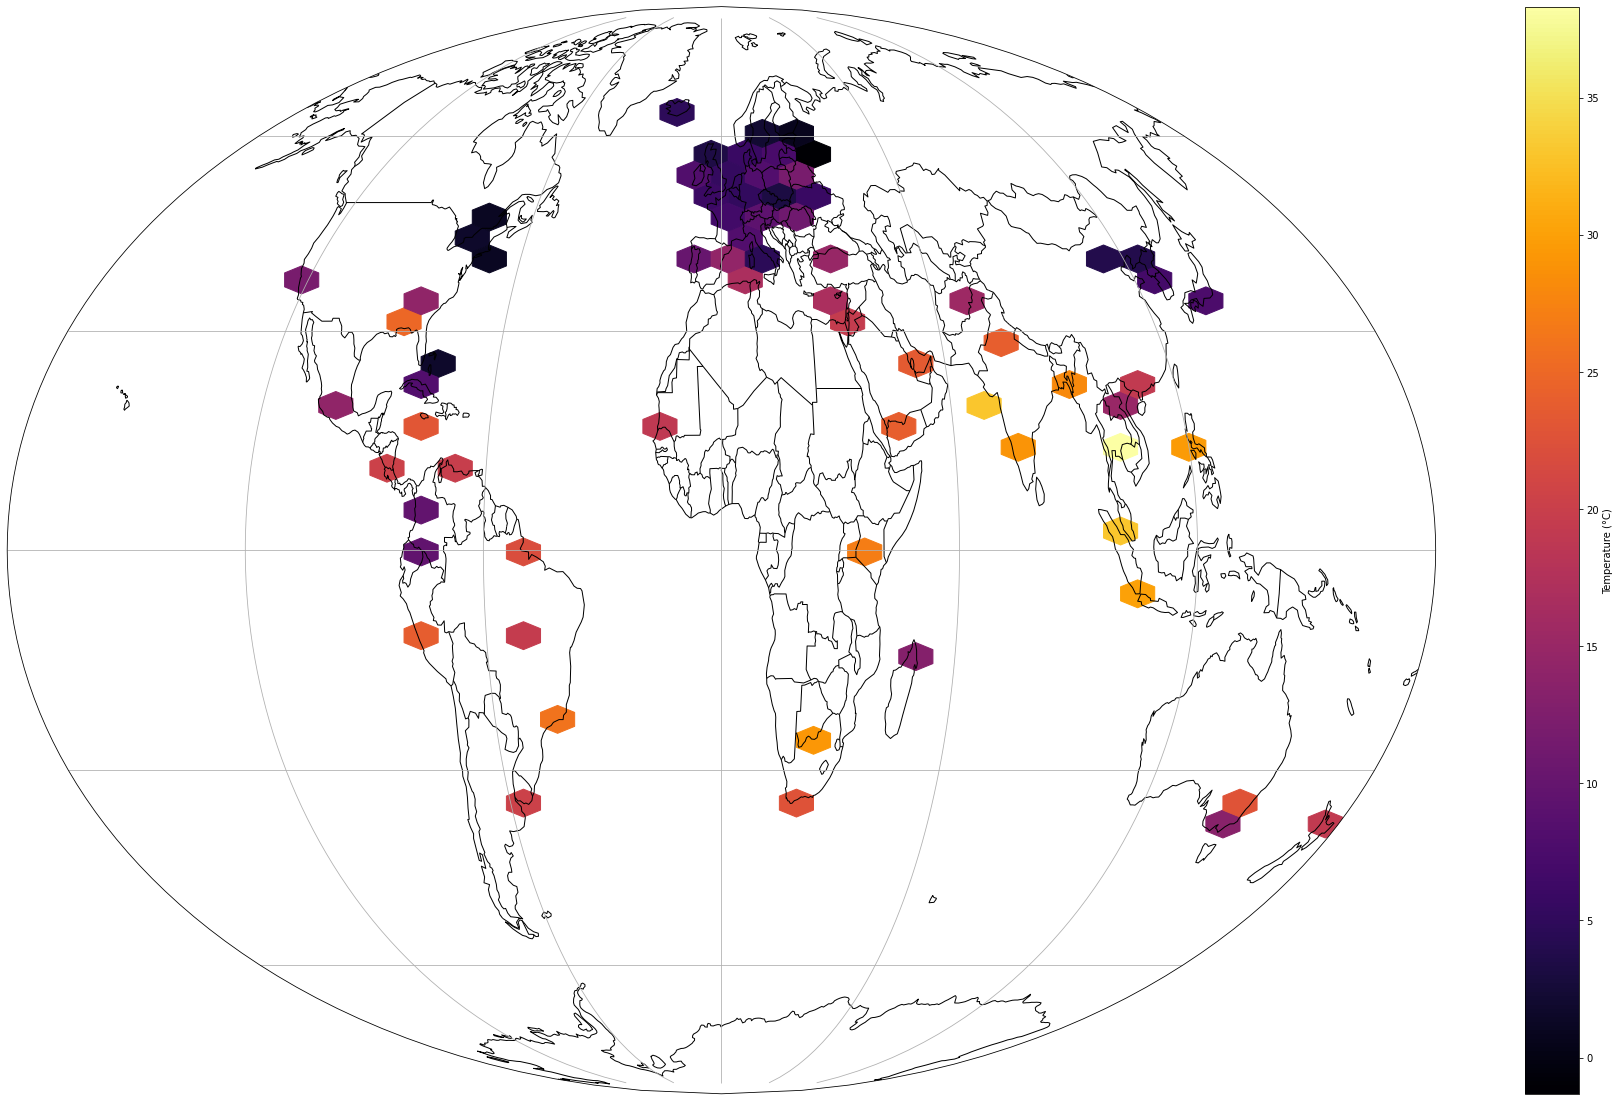

In [97]:
# Call above data
weather_data = pd.read_csv('data/weather_data_with_coords.csv')

# Define map projection within the ccr model
projection = ccrs.Mollweide()

# Create a figure and axis with Mollweide projection
fig, ax = plt.subplots(figsize=(32,20), subplot_kw={'projection': projection})

# Add coastlines
ax.add_feature(cfeature.COASTLINE)

# Add borders
ax.add_feature(cfeature.BORDERS)

# Add gridlines without labels
ax.gridlines(draw_labels=False)

# Plot the cities on the map

#for index, row in weather_data.iterrows():
 #   city = row['City']
  #  temperature = row['Temperature (°C)']
   # latitude = row['Latitude']
    #longitude = row['Longitude']
    
      # Code debugged here using ChatGPT: the country borderlines were not plotted. ccrs.PlateCarree() was employed instead for plotting the data points.
    #ax.scatter(longitude, latitude, color='red', s=100, transform=ccrs.PlateCarree())

# Create a 2D heatmap with hexagonal bins
hb = ax.hexbin(weather_data['Longitude'], weather_data['Latitude'], C=weather_data['Temperature (°C)'], gridsize=30, cmap='inferno', transform=ccrs.PlateCarree())

# Add a colorbar for reference 
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Temperature (°C)')

# Set the aspect ratio of the map
ax.set_aspect('auto')

# Set the map to cover the entire globe
ax.set_global()

# Show plot
plt.show()
